# Aktuelle Data Science-Entwicklungen - Intelligent Text Analysis
Project Presentation
Moritz Schlager & Timo Heiß

**Holly**: So you missed something really big. <br>
**Michael**: It was bigger than I thought. <br>
**Holly**: Well that’s what you said- <br>
**Michael**: No I didn’t say it. Oh no no I didn’t say it. Why are you smiling so much? <br>
[...]

# That’s what the data said: An NLP Analysis of Script Lines from the US TV-Show "The Office"

## The Office
- comedy TV series that follows the daily lives of a group of office workers at the paper company "Dunder Mifflin"
- mockumentary style to show interactions, conflicts and humor
<br>

- more information will be provided by our analysis
- goal: analyze script lines of the show using various traditional and modern NLP-methods to tell more about the office by only looking at the written dialogues

# 1. Dataset and Data Understanding

This notebook aims to give an overview over the subsequent NLP driven analyis of all spoken lines in the US-American TV-show "The Office".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PATH = "../data/"
FILE = "the-office-lines_scripts.csv"

## The Dataset

Dataset: https://data.world/abhinavr8/the-office-scripts-dataset. (27.01.2023)


In [19]:
df = pd.read_csv(PATH+FILE, sep=",", index_col="id")

In [20]:
df.head(3)

,season,episode,scene,line_text,speaker,deleted
id,,,,,,
1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False


In [18]:
df.iloc[24:25]

,season,episode,scene,line_text,speaker,deleted
id,,,,,,
25,1,1,7,"[Strains, grunts] What?",Michael,False


In [3]:
df.shape

(59911, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59911 entries, 1 to 59909
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   season     59911 non-null  int64 
 1   episode    59911 non-null  int64 
 2   scene      59911 non-null  int64 
 3   line_text  59911 non-null  object
 4   speaker    59911 non-null  object
 5   deleted    59911 non-null  bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 2.8+ MB


- 59911 rows (=lines spoken in the show)
    - no missing values
    - correct dtypes
- 6 columns
    - The first three columns indicate the season, episode and scene number of the line. 
    - "line_text" contains the respective line in plain text and additional directiorials in square brackets (e.g. "Jim: [laughing] Hey, Pam!")
    - "speaker" shows the name of the person who said the corresponding line
    - "deleted" indicates whether or not the corresponding line made it into the final version of the show


### Value Analysis

In [9]:
df.describe(include="all").fillna("-")

,season,episode,scene,line_text,speaker,deleted
count,59911.0,59911.0,59911.0,59911,59911,59911
unique,-,-,-,52187,794,2
top,-,-,-,Yeah.,Michael,False
freq,-,-,-,486,12137,57975
mean,5.348283,11.558295,27.143613,-,-,-
std,2.389458,6.986292,17.860703,-,-,-
min,1.0,1.0,1.0,-,-,-
25%,3.0,5.0,14.0,-,-,-
50%,5.0,11.0,25.0,-,-,-
75%,7.0,18.0,37.0,-,-,-


- 9 seasons with a maximum of 26 episodes with at most 116 scenes
- 52187 of the 59911 spoken lines are unique
- "Yeah." is the most frequently spoken line with a total of 486 occurrences
- there are 794 different people speaking throughout the show
- Michael is the character with the most lines with total number of 12137 lines
- 57975 of the available 59911 lines actually made it into the final version of the show

### Data Quality
A few lines were  missing (line break not working). Those were looked at and manually corrected in the csv before loading.
### Limitations
- very few missing lines in scenes (discovered by watching the show and checking the dataset)
- only few directorials; don’t describe everything that happens on screen (context is lost in some cases  (semantic gap))
- "show within a show" scenes (e.g. when characters are watching TV / are listing to the radio) are displayed in a unclear manor
- sometimes different names for the same speaker
- only few features; more features describing the scenes would improve analytical options (e.g. where the scene takes place, …)

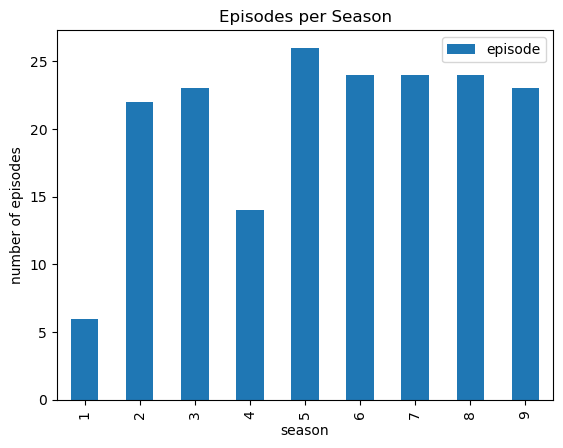

In [10]:
df[["season", "episode"]].drop_duplicates().groupby("season").count().plot.bar()
plt.title("Episodes per Season")
plt.ylabel("number of episodes")
plt.show()

- some episodes seem to be missing: difference to https://en.wikipedia.org/wiki/List_of_The_Office_(American_TV_series)_episodes
- research result: double episodes (e.g. season 2, episode 1 and 2) are listed as one episode in the dataset

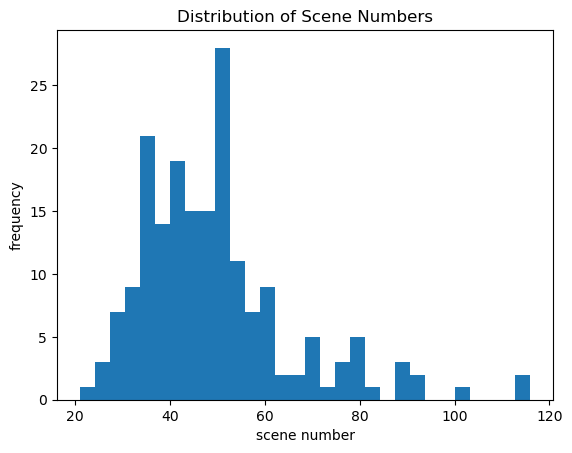

In [11]:
df[["season", "episode", "scene"]].drop_duplicates().groupby(["season", "episode"]).max().hist(grid=False, bins=30)
plt.ylabel("frequency")
plt.xlabel("scene number")
plt.title("Distribution of Scene Numbers")
plt.show()

- note: outliers => double episodes

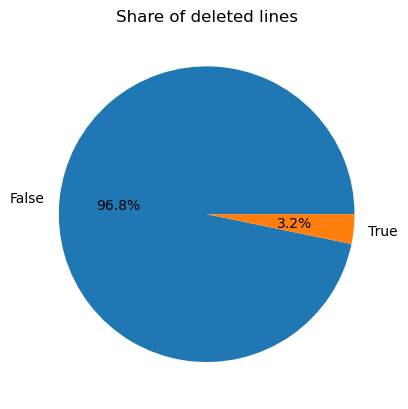

In [28]:
# show a pie chart of the share of deleted lines
plt.figure(dpi=100)
df["deleted"].value_counts().plot.pie(autopct="%.1f%%")

plt.ylabel("")
plt.title("Share of deleted lines")
plt.show()

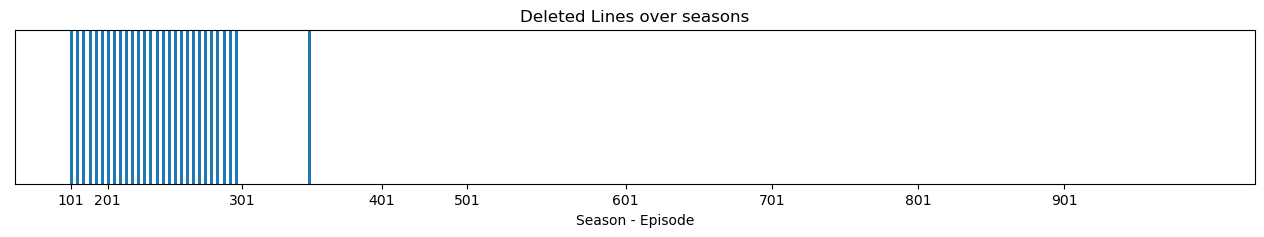

In [9]:
# show the deleted lines over the seasons
df["season_episode"] = df.apply(lambda x: f"{x['season']}{'0' if x['episode']<10 else ''}{x['episode']}", axis=1)

plt.figure(figsize=(16,2))
plt.scatter(df["season_episode"], df["deleted"].sort_index(), alpha=0.5, s=10, c="white")
plt.vlines(df["season_episode"].loc[df["deleted"]==True], ymin=0, ymax=1, linewidths=1)
plt.xticks(["101", "201", "301", "401", "501", "601", "701", "801", "901"])
plt.yticks([])
plt.ylim(0,1)
plt.xlabel("Season - Episode")
plt.title("Deleted Lines over seasons")
plt.show()

- deleted scenes only occur in the first 2 seasons (with one exception in season 3)
- therefore, they are not considered in the following analysis